#### Importação das Bibliotecas

In [1]:
#Bibliotecas
import numpy as np
import pandas as pd
import networkx as nx
import pylab as plt
from networkx.drawing.nx_agraph import graphviz_layout

#### Definição das Classes

Obs: Esta parte está sendo construída para criar qualquer grafo e ser utilizado nas buscas por profundidade, largura, gulosa e demais exemplos de grafos sem bibliotecas nativas como Networkx e Igraph

Obs: Falta finalizar a lógica de percorrer todos os vértices (profundidade, largura ou gulosa) e desenhar.

In [3]:
#Classes
class Vertice:
    #Construtor da Classe
    def __init__(self, rotulo):
        self.rotulo = rotulo       #Atributo que recebe o parametro rotulo
        self.visitado = False      #Atributo inicialmente falso para controlar as buscas no grafo de vertices visitados
        self.adjacentes = []
    
    #Funcao para adicionar o adjacente
    def adiciona_adjacente(self, adjacente):
        self.adjacentes.append(adjacente)
    
    #Funcao para mostrar adjacentes
    def mostra_adjacentes(self):
        for i in self.adjacentes:
            print(i.vertice.rotulo, i.custo)
            
class Adjacente:
    #Construtor da Classe
    def __init__(self, vertice, custo):
        self.vertice = vertice     #Atributo que recebe o parametro vertice
        self.custo = custo         #Atributo que recebe o parametro custo
        
class Grafo:
    #Classe para criar o Grafo, como cada Grafo é único é complexo criar uma função para abstrair a inserção dos vertices 
    A = Vertice('A')
    B = Vertice('B')
    C = Vertice('C')
    D = Vertice('D')
    E = Vertice('E')
    F = Vertice('F')
    G = Vertice('G')
    
    #Adiciona as Arestas de cada vertice criando o objeto e repassando também o custo.
    A.adiciona_adjacente(Adjacente(B,10))
    A.adiciona_adjacente(Adjacente(C,10))
    A.adiciona_adjacente(Adjacente(D,10))
    A.adiciona_adjacente(Adjacente(E,10))
    A.adiciona_adjacente(Adjacente(F,10))
    A.adiciona_adjacente(Adjacente(G,10))
    B.adiciona_adjacente(Adjacente(F,10))
    B.adiciona_adjacente(Adjacente(G,10))
    C.adiciona_adjacente(Adjacente(F,10))
    D.adiciona_adjacente(Adjacente(F,10))
    D.adiciona_adjacente(Adjacente(G,10))
    

#### Criando Objetos

In [4]:
#Criando o objeto grafo
grafo = Grafo()

grafo.A.mostra_adjacentes()

B 10
C 10
D 10
E 10
F 10
G 10


### Utilizando NetworkX

Realmente é uma biblioteca que facilitada bastante a resolução de problemas envolvendo Grafos

Nro. Mínimo de Cores: 3


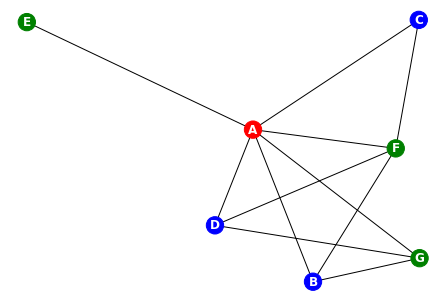

In [2]:
# Networkx possui funções greedy_color que implementa o preenchimento de cor dos vértices do 
# grafo utiliznado uma lógica Gulosa previamente escolhida ou passando uma função criada.

# Cria a função para colorir os vertices conforme descrito nos Tutoriais da Networkx
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.coloring.greedy_color.html#networkx.algorithms.coloring.greedy_color
def pintavertices(G):
    # Definicao de variaveis
    colorpalette = {0:'red', 1:"green", 2:"blue", 3:"orange", 4:"pink", 5:"yellow"}
    mapadecor = []

    # Chama a função greedy_color passando a Estratégia "largest_First" que segundo a documentação implementa
    # um preenchimento de cor gulosa, baseado no grau de cada vértice em ordem descrescente de grau
    g_color = nx.coloring.greedy_color(G, strategy="largest_first")
    
    #Exibe o Nro. Cromático para aferição
    chromaticnumber = max(g_color.values())+1
    print("Nro. Mínimo de Cores:", chromaticnumber)
    
    # Preenchimento das cortes de cada vértice, precisamos criar um laço para facilitar o preenchimento
    for node in G:
        mapadecor.append(colorpalette[g_color[node]])
    return mapadecor

# Criação do Grafo
G = nx.Graph()

# Criação de todos os vértices.
V = ["A", "B", "C", "D", "E", "F", "G"]
# Criação de toas as arestas, com apoio de outros colegas que já haviam desenhando os vértices.
E = [("A", "B"), ("A", "C"), ("A", "D"), ("A", "E"), ("A", "F"), ("A", "G"),("B", "F"), ("B", "G"), ("C", "F"), ("D", "F"), ("D", "G")]
# Adicionando os vérticees ao grafo.
G.add_nodes_from(V)
# Adicionando as Arestas ao Grafo
G.add_edges_from(E)

# Mostra o grafo colorido
mapadecor=pintavertices(G)
nx.draw(G, pos=nx.spring_layout(G), with_labels=True, font_weight='bold', font_color="w", node_color=mapadecor)